# Appendix 1 - Code

Here's the code used to import, clean, and process the datasets. 

## Data import and cleaning

In [1]:
# importing necessary libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind


In [2]:
# import pre-asessment dataframe

pre_df = pd.read_csv('Datasets/Pre-Assessment.csv')
pre_df.head()

,Are you:,What is your major?,Gender,Age,What is the highest level of education your parents/guardians have completed?,How many books do you or your family have at home?,"How comfortable are you in reading, understanding, and communicating in English?",Do you work?,Do you live:,"On average, how many hours of sleep do you get each night?",...,"In the previous question, which statement is used as support for the main claim?",A company has seen a 20% decrease in sales due to a new competitor. \nWhat could be a potential first step to address this problem?,Continue thinking about the scenario from the previous question. Let's say that you decided to analyze the competitor's strengths. \nThey have a more user-friendly website and faster delivery times. \nWhat could be your next step?,"Consider the claim: \n""Diet rich in fruits and vegetables leads to better health."" \nWhich of the following would be strongest evidence for this claim?","Continue thinking about the scenario from the previous question.\n\nBased on your selected answer about the best evidence, how strongly does it support the claim (0-weak, 2-strong)?","Consider the argument: \n""All birds can fly. Penguins are birds. Therefore, penguins can fly."" \nWhat is wrong with this argument?","If an argument says: \n""If it rains, then there are clouds. It doesn't rain. Therefore, there are no clouds.\nIs the conclusion correct?","Considering the statement: \n""Home-schooling is better than traditional schooling."" \nWhich of the following perspectives may disagree?",Consider the issue of regulation of social media content (such as laws limiting what can be shared on social media). \nWhich perspective might support stricter regulations?,"Consider the problem: \n""A bat and ball cost $1.10 in total. The bat costs $1.00 more than the ball. How much does the ball cost?"" \nWhat's your answer?"
0,Freshman,Liberal Arts,Male,18,Graduate degree.,More than 50,Absolutely comfortable.,No,By yourself,Between 6 and 8,...,No support is presented.,Analyze the competitor's strengths and weaknes...,Improve the company's website usability and de...,A scientific study showing lower rates of dise...,1,Two sentences are not true.,No,A student who enjoys socializing with classmat...,A government official concerned about fake new...,$0.10
1,Sophomore,Liberal Arts,Male,19,High-school degree.,Between 5 and 20,Somewhat comfortable.,"Yes, part-time.",With parents,Between 6 and 8,...,Bullying and distractions are a problem in sch...,Analyze the competitor's strengths and weaknes...,Improve the company's website usability and de...,An article saying fruits and vegetables are ri...,2,One of the sentences is not true.,No,A teacher who believes they can provide better...,A government official concerned about fake news.,$0.10
2,Freshman,Liberal Arts,Female,22,High-school degree.,Less than 5,Somewhat comfortable.,"Yes, part-time.",With parents,Between 6 and 8,...,School uniforms are mandatory.,Analyze the competitor's strengths and weaknes...,Improve the company's website usability and de...,Your friend saying they feel healthier after e...,2,One of the sentences is not true.,No,A curriculum developer who designs home-school...,A government official concerned about fake news.,$0.10
3,Freshman,Liberal Arts,Female,19,High-school degree.,Less than 5,Fairly comfortable.,No,By yourself,Between 4 and 6,...,School uniforms reduce distractions and bullying.,Analyze the competitor's strengths and weaknes...,Improve the company's website usability and de...,A scientific study showing lower rates of dise...,2,Two sentences are not true.,No,A parent who wants their child to have more in...,A government official concerned about fake news.,$0.10
4,Sophomore,Ethnic and Race Studies,Female,28,High-school degree.,Between 20 and 50,Fairly comfortable.,"Yes, full time.",With parents,Between 4 and 6,...,Bullying and distractions are a problem in sch...,Increase advertising budget.,Improve the company's website usability and de

In [3]:
# import post-asessment dataframe

post_df = pd.read_csv('Datasets/Post-Assessment.csv')
post_df.head()

,Are you:,What is your major?,Age,Gender,What is the highest level of education your parents/guardians have completed?,How many books do you or your family have at home?,"How comfortable are you in reading, understanding, and communicating in English?",Do you work?,Do you live:,What was your GPA in high-school?,...,"In the previous question statement, what is used as support for the claim?",A project your team is working on is over budget. \nWhat could be a potential first step to address this problem?,Continue thinking about the scenario from the previous question. \nLet's say that you you decided to analyze the budget. You found some unnecessary expenses. \nWhat could be your next step?,"Consider the claim: \n""Regular physical activity reduces the risk of chronic diseases."" \nWhich of the following would be the strongest evidence for this claim?","Continue thinking about the scenario from the previous question.\n\nBased on your selected answer about the best evidence, how strongly does it support the claim (0-weak, 2-strong)?","Consider the argument: \n""Strawberries are fruits. All fruits grow on trees. Therefore, strawberries grow on trees."" \nWhat is the mistake in this argument?","If an argument says: \n""If it's hot, then people swim. It's cold. Therefore, people don't swim."" \nIs the logic of this argument valid or not?","Considering the statement: \n""Online learning is more effective than traditional classroom learning."" \nWhich of the following perspectives may disagree?",Consider the topic of implementing stricter gun control laws.\nWhich perspective might oppose stricter regulations?,"Consider the problem: \n""A coffee and a muffin cost $6 in total. The coffee costs $5 more than the muffin. How much does the muffin cost?"" \nWhat's your answer?"
0,Sophomore,Computer Science,22,Male,College degree.,Less than 5,Fairly comfortable.,"Yes, part-time.",With parents,2.7,...,Vaccinations prevent serious diseases.,Analyze the budget and spending to identify co...,Cut all the unnecessary expenses.,A scientific study showing that physically act...,2,One of the premises is not true,NaN,"A student who learns better in interactive, so...",A citizen concerned about personal safety and ...,$1.00
1,Sophomore,Psychology,19,Female,High-school degree.,Between 20 and 50,Comfortable enough to understand most things.,"Yes, part-time.",With parents,2.7,...,Serious diseases are a problem.,Analyze the budget and spending to identify co...,Cut all the unnecessary expenses.,A scientific study showing that physically act...,2,Both,Yes,"A student who learns better in interactive, so...",A citizen concerned about personal safety and ...,$1.00
2,Freshman,9-14 program,16,Female,High-school degree.,Between 5 and 20,Comfortable enough to understand most things.,No,With parents,4.0,...,Vaccinations prevent serious diseases.,Analyze the budget and spending to identify co...,Cut all the unnecessary expenses.,A scientific study showing that physically act...,1,It is not supported by logic,Yes,"A student who learns better in interactive, so...",A citizen concerned about personal safety and ...,$1.00
3,Freshman,Computer Science,18,Male,High-school degree.,Between 20 and 50,Absolutely comfortable.,No,With parents,2.0,...,Vaccinations prevent serious diseases.,Analyze the budget and spending to identify co...,Cut all the unnecessary expenses.,A scientific study showing that physically act...,2,One of the premises is not true,Yes,"A student who learns better in interactive, so...",A citizen concerned about personal safety and ...,$0.50
4,Sophomore,Ethnic and Race Studies,28,Female,Did not complete high school.,More than 50,Absolutely comfortable.,"Yes, full time.",By yourself,3.0,...,Vaccinations prevent serious diseases.,Analyze the budget and spending to identify co...,Cut all the unnecessary expenses.,A scientific study showing that physically act...,1,Both,No,"A student who learns better in interactive, so...",A citizen concerned about personal saf

# Tidying the dataset

In [4]:
# Check all the columns

pre_df.columns

Index(['Are you:', 'What is your major?', 'Gender', 'Age',
       'What is the highest level of education your parents/guardians have completed? ',
       'How many books do you or your family have at home?',
       'How comfortable are you in reading, understanding, and communicating in English?',
       'Do you work?', 'Do you live:',
       'On average, how many hours of sleep do you get each night?',
       'What was your GPA in high-school? ',
       'How motivated are you to improve your critical thinking skills?',
       'Do you consider yourself a good critical thinker?',
       'Have you ever attended a course or training specifically focused on developing critical thinking skills before? ',
       'Consider the statement: \n"School uniforms should be mandatory as they reduce distractions and bullying." \nWhat is the main claim here?',
       'In the previous question, which statement is used as support for the main claim? ',
       'A company has seen a 20% decrease in sales 

In [5]:
# make a single function to clean the dataset

def clean_data(df):
   
    # Drop missing values
    df.dropna(inplace=True)
    
    # Rename columns
    rename_dict = {
        'Are you:': 'Level',
        'What is your major?': 'Major',
        'What is the highest level of education your parents/guardians have completed? ': 'Parental education',
        'How many books do you or your family have at home?' : 'Amount of books at home',
        'How comfortable are you in reading, understanding, and communicating in English?': 'English proficiency',
        'Do you work?' : 'Working students',
        'Do you live:' : 'Living with',
        'What was your GPA in high-school? ' : 'GPA',
        'On average, how many hours of sleep do you get each night?': 'Amount of sleep',
        'How motivated are you to improve your critical thinking skills?': 'Motivation',
        'Do you consider yourself a good critical thinker?': 'Confident',
        'Have you ever attended a course or training specifically focused on developing critical thinking skills before? ': 'Had CRT before'
        
        
    }
    df.rename(columns=rename_dict, inplace=True)
    
    # Clean 'English proficiency' column
    df['English proficiency'] = df['English proficiency'].str.replace('.', '', regex=False)
    df['English proficiency'] = df['English proficiency'].str.replace('Comfortable enough to understand most things', 'Comfortable enough', regex=False)
    
    # Clean 'Parental education' column
    df['Parental education'] = df['Parental education'].str.replace('.', '', regex=False)
    df['Parental education'] = df['Parental education'].replace('Did not complete high school', 'No high school')
    
    # Clean 'Working students' column
    df['Working students'] = df['Working students'].str.replace('.', '', regex=False)
    df['Working students'] = df['Working students'].str.replace('Yes, full time', 'Full time', regex=False)
    df['Working students'] = df['Working students'].str.replace('Yes, part-time', 'Part time', regex=False)
    
    # Clean 'Living with' column
    df['Living with'] = df['Living with'].str.replace('With parents', 'Parents', regex=False)
    df['Living with'] = df['Living with'].str.replace('By yourself', 'Myself', regex=False)
    
    # Clean 'GPA' column
    df['GPA'] = pd.to_numeric(df['GPA'], errors='coerce')
    df['GPA'] = df['GPA'].astype(str)
    
    # Categorize majors
    unique_majors = df['Major'].unique()
    mapping = {
        'Liberal Arts': ['Liberal Arts', 'Ethnic and Race Studies'],
        'Sciences': ['science of forensics', 'Science for Health', 'Forensic Science',
                     'health science', 'Health Science', 'Engineering Science',
                     'Sciences in Health', 'Science for health', 'Applied Science',
                     'Science for Health professions (Vet Technician)', 'engineering science', 'Engineering science'],
        'Humanities': ['Jazz and Popular Music', 'digital marketing',
                       'Not Sure but Undecided', 'Critical Thinking & Justice',
                       'digital marketing', 'Communication Studies', 'Sociology',
                       'Human Services', 'Psychologist', '9-14 program',
                       'My school primarily focuses on production.'],
        'Others': ['Business Administration and Management', 'graduated already',
                   'Nusing', 'Multimedia programming and design',
                   'Public Health', 'Forensics', 'CRT-100 Senior Year',
                   'I don’t have a major', 'Criminal Justice', 'Education']
    }
    major_group_mapping = {major: category for category, majors in mapping.items() for major in majors}
    df['Major group'] = df['Major'].map(major_group_mapping).fillna('Others')
    
    # Categorize age
    df = df[pd.to_numeric(df['Age'], errors='coerce').notnull()]
    df['Age'] = df['Age'].astype(int)
    bins = [0, 18, 25, 30, 40]
    labels = ['0-18', '19-25', '26-30', '31-40']
    df['Age group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
    df['Age group'] = df['Age group'].astype(str)
    
    return df

In [6]:
# apply the function

pre_df = clean_data(pre_df)
post_df = clean_data(post_df)

/var/folders/6q/ndqjw6ws3jx7kqy618mjsznc0000gn/T/ipykernel_86783/1541323171.py:71: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age'] = df['Age'].astype(int)
/var/folders/6q/ndqjw6ws3jx7kqy618mjsznc0000gn/T/ipykernel_86783/1541323171.py:74: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Age group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)
/var/folders/6q/ndqjw6ws3jx7kqy618mjsznc0000gn/T/ipykernel_86783/1541323171.py:75: SettingWithCopyWarning: 
A value is trying to be set on a copy

In [7]:
# make separate functions to calculate the students scores on the thinking questions for pre- and post-survey

# start by renaming the questions for easier handling

def rename_columns_with_questions(df, start_index=6):

    question_columns = df.columns[start_index:]  # Get all columns from the specified start index onwards
    new_question_titles = [f"Question {i+1}" for i in range(len(question_columns))]  # Create new titles

    # Update the DataFrame with new titles
    df.columns = list(df.columns[:start_index]) + new_question_titles

    return df

#rename_columns_with_questions(pre_df, start_index=14)

pre_df = rename_columns_with_questions(pre_df, start_index=14)
post_df = rename_columns_with_questions(post_df, start_index=14)

In [8]:
# make a function to grade all the questions and add the points to a new column

def grade_questions(df, correct_answers):
    df['Score'] = 0

    for question, correct_answer in correct_answers.items():
        df['Score'] += df[question].apply(lambda x: 1 if x == correct_answer else 0)

    df = df.drop(columns=list(correct_answers.keys()))
    
    return df

In [9]:
# make a dictionary with correct answers for pre-survey

correct_answers_pre = {
    'Question 1': 'School uniforms should be mandatory.',
    'Question 2': 'School uniforms reduce distractions and bullying.',
    'Question 3': "Analyze the competitor's strengths and weaknesses.",
    'Question 4': "Improve the company's website usability and delivery times.",
    'Question 5': 'A scientific study showing lower rates of disease in people who eat more fruits and vegetables.',
    'Question 6': 2,
    'Question 7': 'One of the sentences is not true.',
    'Question 8': 'No',
    'Question 9': ['A student who enjoys socializing with classmates in a traditional school.', 'A teacher who believes they can provide better instruction than a parent.'],
    'Question 10': 'A government official concerned about fake news.',
    'Question 11': '$0.05'
}

# apply the function to the pre-survey

pre_df = grade_questions(pre_df, correct_answers_pre).drop(columns=['Question 12', 'Question 13'])

/var/folders/6q/ndqjw6ws3jx7kqy618mjsznc0000gn/T/ipykernel_86783/3286943314.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Score'] = 0


In [10]:
# checking how it looks

pre_df.head()

,Level,Major,Gender,Age,Parental education,Amount of books at home,English proficiency,Working students,Living with,Amount of sleep,GPA,Motivation,Confident,Had CRT before,Score
0,Freshman,Liberal Arts,Male,18,Graduate degree,More than 50,Absolutely comfortable,No,Myself,Between 6 and 8,3.0,Very motivated.,Yes,Yes,4
1,Sophomore,Liberal Arts,Male,19,High-school degree,Between 5 and 20,Somewhat comfortable,Part time,Parents,Between 6 and 8,3.3,Very motivated.,Yes,No,6
2,Freshman,Liberal Arts,Female,22,High-school degree,Less than 5,Somewhat comfortable,Part time,Parents,Between 6 and 8,3.3,Very motivated.,I don't know,No,6
3,Freshman,Liberal Arts,Female,19,High-school degree,Less than 5,Fairly comfortable,No,Myself,Between 4 and 6,3.3,Fairly motivated.,No,No,7
4,Sophomore,Ethnic and Race Studies,Female,28,High-school degree,Between 20 and 50,Fairly comfortable,Full time,Parents,Between 4 and 6,3.3,Fairly motivated.,I don't know,No,5


In [11]:
# doing the same for the post-assessment

# first, define the correct answers dictionary

correct_answers_post = {
    'Question 1': 'Vaccinations should be mandatory.',
    'Question 2': 'Vaccinations prevent serious diseases.',
    'Question 3': 'Analyze the budget and spending to identify cost overruns.',
    'Question 4': 'Cut all the unnecessary expenses.',
    'Question 5': 'A scientific study showing that physically active people have lower rates of chronic disease.',
    'Question 6': '2',
    'Question 7': 'One of the premises is not true',
    'Question 8': 'No',
    'Question 9': 'A student who learns better in interactive, social environments.',
    'Question 10': 'A citizen concerned about personal safety and self-defense.',
    'Question 11': '$0.5'
}

post_df = grade_questions(post_df, correct_answers_post)


In [12]:
# check 

post_df.head(3)

,Level,Major,Age,Gender,Parental education,Amount of books at home,English proficiency,Working students,Living with,GPA,Amount of sleep,Motivation,Do you consider yourself a better critical thinker than at the start of the semester?,Have you used tutoring services for your CRT course?,Question 12,Question 13,Score
1,Sophomore,Psychology,19,Female,High-school degree,Between 20 and 50,Comfortable enough,Part time,Parents,2.7,Between 4 and 6,Fairly motivated.,No,No,Others,19-25,5
2,Freshman,9-14 program,16,Female,High-school degree,Between 5 and 20,Comfortable enough,No,Parents,4.0,8 or more,Fairly motivated.,Yes,No,Humanities,0-18,6
3,Freshman,Computer Science,18,Male,High-school degree,Between 20 and 50,Absolutely comfortable,No,Parents,2.0,Between 6 and 8,Very motivated.,Yes,No,Others,19-25,8


In [13]:
# additional cleanup

post_df.columns

rename_dict = {
    'Do you consider yourself a better critical thinker than at the start of the semester?': 'Notices improvement',
    'Have you used tutoring services for your CRT course? ': 'Used tutor'
}

post_df.rename(columns=rename_dict, inplace=True)

post_df.drop(columns=['Question 12', 'Question 13'], inplace=True)


In [14]:
# check again

post_df.head()

,Level,Major,Age,Gender,Parental education,Amount of books at home,English proficiency,Working students,Living with,GPA,Amount of sleep,Motivation,Notices improvement,Used tutor,Score
1,Sophomore,Psychology,19,Female,High-school degree,Between 20 and 50,Comfortable enough,Part time,Parents,2.7,Between 4 and 6,Fairly motivated.,No,No,5
2,Freshman,9-14 program,16,Female,High-school degree,Between 5 and 20,Comfortable enough,No,Parents,4.0,8 or more,Fairly motivated.,Yes,No,6
3,Freshman,Computer Science,18,Male,High-school degree,Between 20 and 50,Absolutely comfortable,No,Parents,2.0,Between 6 and 8,Very motivated.,Yes,No,8
4,Sophomore,Ethnic and Race Studies,28,Female,No high school,More than 50,Absolutely comfortable,Full time,Myself,3.0,Between 4 and 6,Very motivated.,Yes,No,8
5,Sophomore,Criminal Justice,26,Female,No high school,More than 50,Absolutely comfortable,Full time,Myself,3.3,Between 6 and 8,Very motivated.,Yes,No,7


In [15]:
print('Mean score of PRE:', pre_df['Score'].mean())
print('Mean score of POST:', post_df['Score'].mean())
print('Standard deviation score of PRE:', pre_df['Score'].std())
print('Standard deviation score of POST:', post_df['Score'].std())

Mean score of PRE: 6.2
Mean score of POST: 6.6902654867256635
Standard deviation score of PRE: 1.5955881797457208
Standard deviation score of POST: 1.6587411643520682


# Hypothesis Testing

In [16]:
# defining the variables to test

scores_pre = pre_df['Score']
scores_post = post_df['Score']

In [17]:
# Compute t-statistic and p-value

t_stat, p_value = ttest_ind(scores_pre, scores_post, equal_var=True)
print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

T-statistic: -2.6683650770836427
P-value: 0.007970787980641027


In [18]:
# Checking the effect size

mean_pre = 6.2
mean_post = 6.6902654867256635
std_pre = 1.5955881797457208
std_post = 1.6587411643520682
n_pre = len(pre_df['Score'])
n_post = len(post_df['Score'])


# Cohen's d calculation

# Calculate pooled standard deviation
s_p = np.sqrt(((n_pre - 1) * std_pre**2 + (n_post - 1) * std_post**2) / (n_pre + n_post - 2))

# Calculate Cohen's d using the pooled standard deviation
cohens_d = (mean_post - mean_pre) / s_p

print(f"Pooled Cohen's d: {cohens_d}")

Pooled Cohen's d: 0.30343417836348074


# Data Visualization

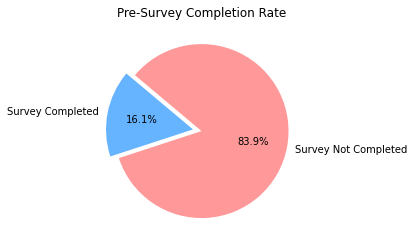

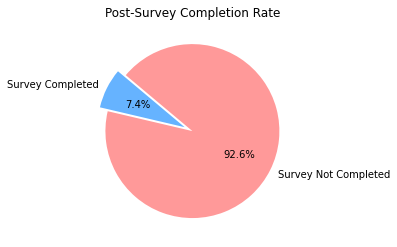

In [19]:
import matplotlib.pyplot as plt

# Data for Pre-Survey
total_students_pre = 1518
survey_completed_pre = 245
survey_not_completed_pre = total_students_pre - survey_completed_pre

# Data for Post-Survey
total_students_post = 1518
survey_completed_post = 113
survey_not_completed_post = total_students_post - survey_completed_post

labels = ['Survey Completed', 'Survey Not Completed']
sizes_pre = [survey_completed_pre, survey_not_completed_pre]
sizes_post = [survey_completed_post, survey_not_completed_post]
colors = ['#66b3ff', '#ff9999']
explode = (0.1, 0)  # explode 1st slice

# Pie chart for Pre-Survey
fig1, ax1 = plt.subplots()
ax1.pie(sizes_pre, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax1.set_aspect('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.set_title('Pre-Survey Completion Rate')

# Display the Pre-Survey plot
plt.show()

# Pie chart for Post-Survey
fig2, ax2 = plt.subplots()
ax2.pie(sizes_post, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=False, startangle=140)
ax2.set_aspect('equal')
ax2.set_title('Post-Survey Completion Rate')

# Display the Post-Survey plot
plt.show()

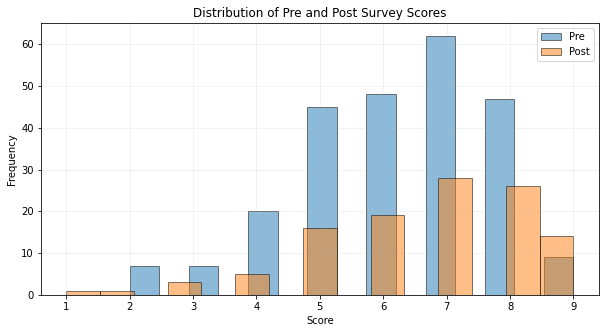

In [20]:
plt.figure(figsize=(10,5))
plt.hist(pre_df['Score'], bins=15, alpha=0.5, label='Pre', edgecolor='black')
plt.hist(post_df['Score'], bins=15, alpha=0.5, label='Post', edgecolor='black')

# Add labels and title
plt.xlabel('Score')
plt.ylabel('Frequency')
plt.title('Distribution of Pre and Post Survey Scores')
plt.legend(loc='upper right')
plt.grid(alpha=0.2)

# Show plot
plt.show()


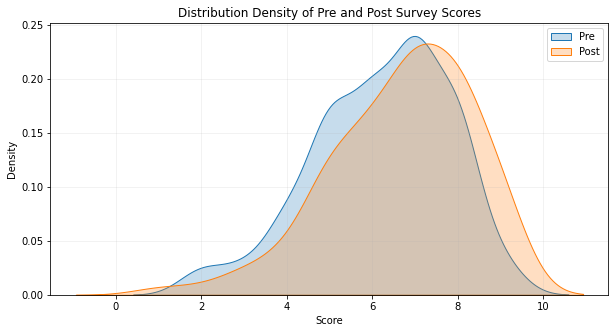

In [21]:
import seaborn as sns
plt.figure(figsize=(10,5))
# Plot the density plots
sns.kdeplot(pre_df['Score'], label='Pre', shade=True)
sns.kdeplot(post_df['Score'], label='Post', shade=True)

# Add labels and title
plt.xlabel('Score')
plt.ylabel('Density')
plt.title('Distribution Density of Pre and Post Survey Scores')
plt.legend(loc='upper right')
plt.grid(alpha=0.2)

# Show plot
plt.show()


In [22]:
pre_df.head()

,Level,Major,Gender,Age,Parental education,Amount of books at home,English proficiency,Working students,Living with,Amount of sleep,GPA,Motivation,Confident,Had CRT before,Score
0,Freshman,Liberal Arts,Male,18,Graduate degree,More than 50,Absolutely comfortable,No,Myself,Between 6 and 8,3.0,Very motivated.,Yes,Yes,4
1,Sophomore,Liberal Arts,Male,19,High-school degree,Between 5 and 20,Somewhat comfortable,Part time,Parents,Between 6 and 8,3.3,Very motivated.,Yes,No,6
2,Freshman,Liberal Arts,Female,22,High-school degree,Less than 5,Somewhat comfortable,Part time,Parents,Between 6 and 8,3.3,Very motivated.,I don't know,No,6
3,Freshman,Liberal Arts,Female,19,High-school degree,Less than 5,Fairly comfortable,No,Myself,Between 4 and 6,3.3,Fairly motivated.,No,No,7
4,Sophomore,Ethnic and Race Studies,Female,28,High-school degree,Between 20 and 50,Fairly comfortable,Full time,Parents,Between 4 and 6,3.3,Fairly motivated.,I don't know,No,5


In [23]:
# Make a new dataframe to plot comparative charts

# Add a column to indicate the survey type
pre_df['Survey'] = 'Pre'
post_df['Survey'] = 'Post'

# Combine the DataFrames
combined_df = pd.concat([pre_df, post_df])

# List of variables to compare
variables = ['Gender', 'Working students', 'Living with', 'Parental education', 'GPA', 'Motivation', 'Confident']

# Melt the DataFrame
melted_df = pd.melt(combined_df, id_vars=['Survey', 'Score'], value_vars=variables, 
                    var_name='Variable', value_name='Value')

# Clean up one column a bit, for easier visualization

name_mapping = {
    'Very motivated.': 'Very',
    'Fairly motivated.': 'Fairly',
    'Somewhat motivated.': 'Somewhat',
    'Not really motivated.': 'Not really'
}
    
combined_df['Motivation'].replace(name_mapping, inplace=True)

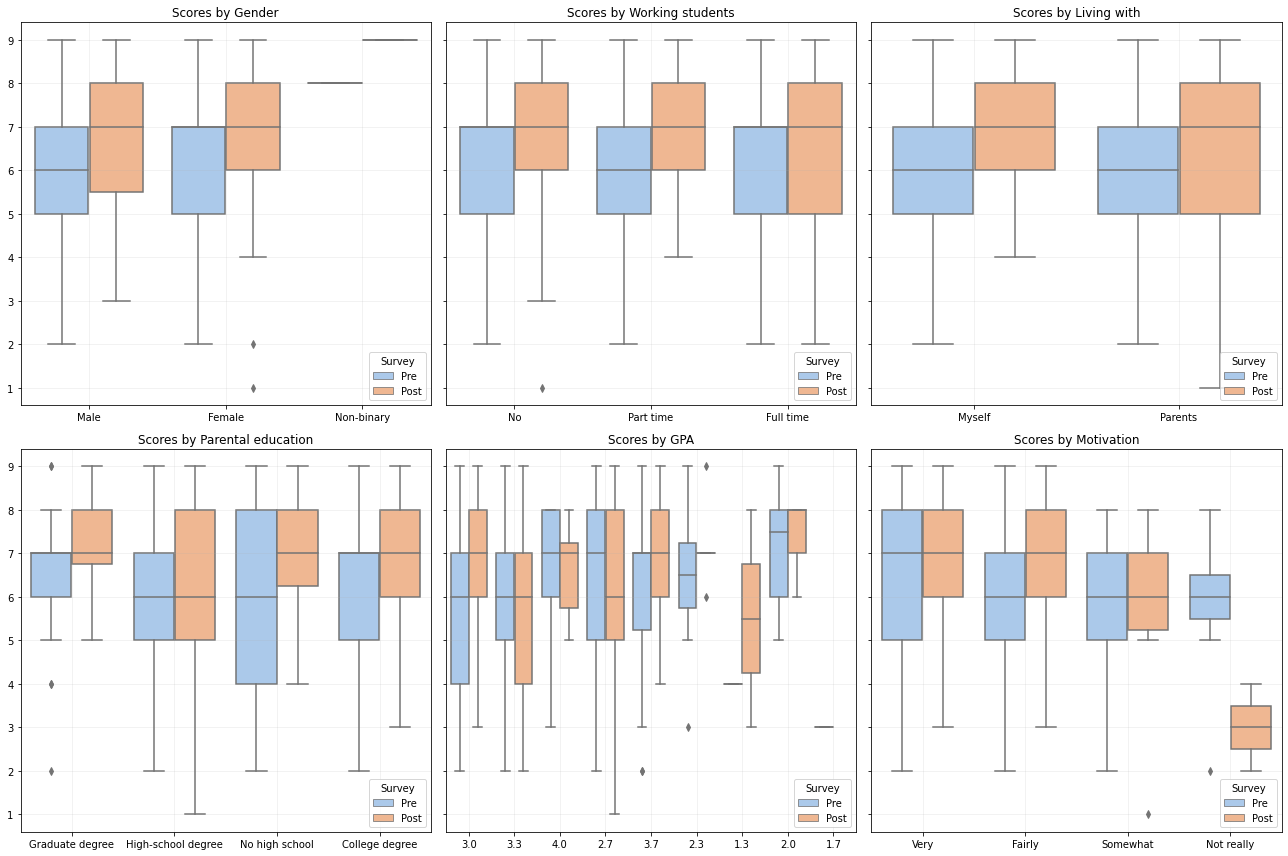

In [24]:
# Define the number of rows and columns for the grid
n_rows = 2
n_cols = 3

# Create a figure and a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(18, 12), sharey=True)

# Flatten the axes array for easy iteration
axes = axes.flatten()

# Plot each variable in a separate subplot
for ax, variable in zip(axes, variables):
    sns.boxplot(x=variable, y='Score', hue='Survey', data=combined_df, ax=ax, palette='pastel')
    ax.set_title(f'Scores by {variable}')
    ax.grid(alpha=0.2)
    ax.legend(title='Survey', loc='lower right')
    ax.set_xlabel('')  
    ax.set_ylabel('')  

plt.tight_layout()

plt.show()


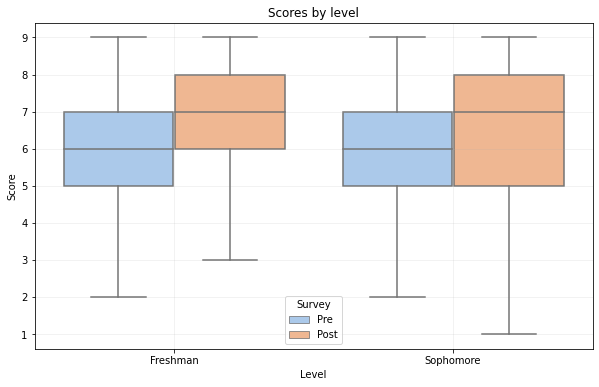

In [25]:
colors = ['#66b3ff', '#ff9999']

plt.figure(figsize=(10, 6))
sns.boxplot(x='Level', y='Score', hue='Survey', data=combined_df, palette='pastel')
plt.title(f'Scores by level')
plt.grid(alpha=0.2)
plt.legend(title='Survey')
plt.show()

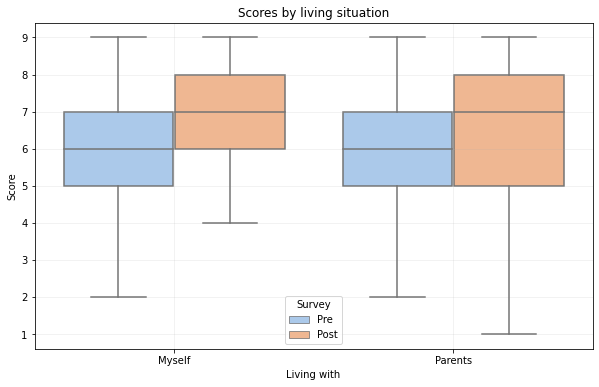

In [26]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Living with', y='Score', hue='Survey', data=combined_df, palette='pastel')
plt.title(f'Scores by living situation')
plt.grid(alpha=0.2)
plt.legend(title='Survey')
plt.show()

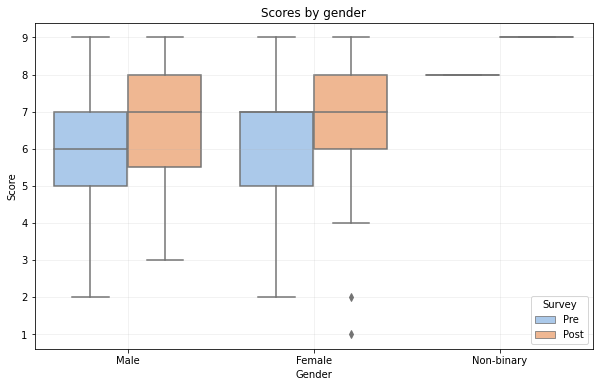

In [27]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Gender', y='Score', hue='Survey', data=combined_df, palette='pastel')
plt.title(f'Scores by gender')
plt.grid(alpha=0.2)
plt.legend(title='Survey')
plt.show()

In [28]:
# Combine age into groups for easier plotting

bins = [0, 20, 30, 40, combined_df['Age'].max()]
labels = ['0-20', '21-30', '31-40', '41+']
combined_df['Age Group'] = pd.cut(combined_df['Age'], bins=bins, labels=labels, right=False)

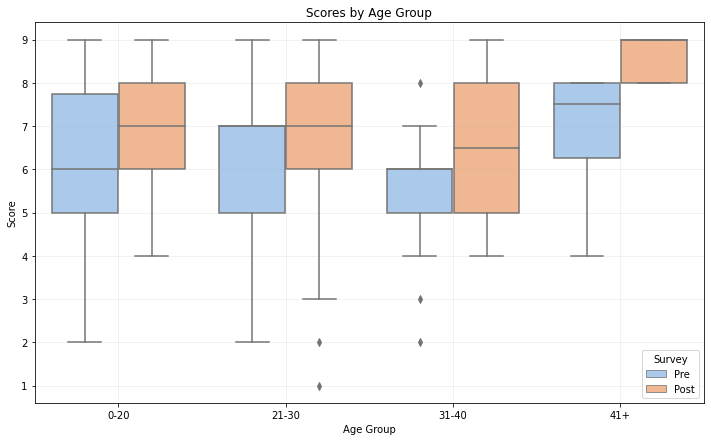

In [29]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='Age Group', y='Score', hue='Survey', data=combined_df, palette='pastel')
plt.title('Scores by Age Group')
plt.grid(alpha=0.2)
plt.legend(title='Survey', loc='lower right')
plt.show()

In [30]:
# Group GPA for easier plotting

combined_df['GPA'] = pd.to_numeric(combined_df['GPA'])

gpa_bins = [1.3, 2.3, 3.3, 4.0]
gpa_labels = ['1.3-2.3', '2.7-3.3', '3.7-4.0']
combined_df['GPA Group'] = pd.cut(combined_df['GPA'], bins=gpa_bins, labels=gpa_labels, right=False)

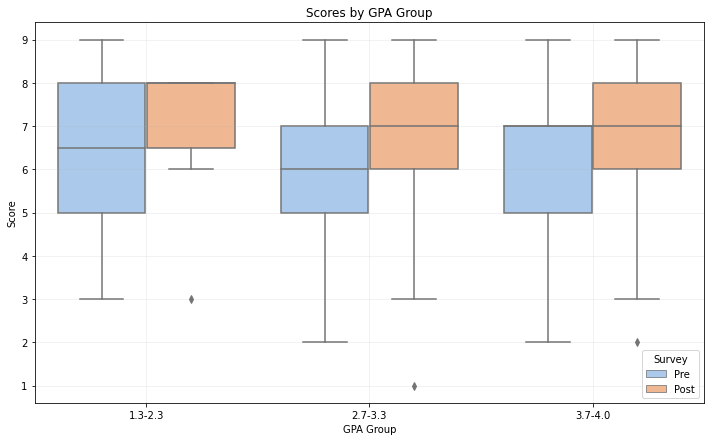

In [31]:
plt.figure(figsize=(12, 7))
sns.boxplot(x='GPA Group', y='Score', hue='Survey', data=combined_df, palette='pastel')
plt.title('Scores by GPA Group')
plt.grid(alpha=0.2)
plt.legend(title='Survey', loc='lower right')
plt.show()

# T-test on a subset

In [32]:
# Create subsets based on the criteria

# 1. Gender: Male
male_pre_scores = pre_df[pre_df['Gender'] == 'Male']['Score']
male_post_scores = post_df[post_df['Gender'] == 'Male']['Score']

# 2. Working Students: Part-time
part_time_pre_scores = pre_df[pre_df['Working students'] == 'Part time']['Score']
part_time_post_scores = post_df[post_df['Working students'] == 'Part time']['Score']

# 3. GPA: 3.0
gpa_pre_scores = pre_df[pre_df['GPA'] == '3.0']['Score']
gpa_post_scores = post_df[post_df['GPA'] == '3.0']['Score']

# 4. Motivation: 'Fairly motivated'
motivated_pre_scores = pre_df[pre_df['Motivation'] == 'Fairly motivated.']['Score']
motivated_post_scores = post_df[post_df['Motivation'] == 'Fairly motivated.']['Score']

# 5. Parental Education: No high school degree
no_high_school_pre_scores = pre_df[pre_df['Parental education'] == 'No high school']['Score']
no_high_school_post_scores = post_df[post_df['Parental education'] == 'No high school']['Score']

# Run t-tests on the subsets
t_stat_male, p_value_male = ttest_ind(male_pre_scores, male_post_scores, equal_var=True)
t_stat_part_time, p_value_part_time = ttest_ind(part_time_pre_scores, part_time_post_scores, equal_var=True)
t_stat_gpa, p_value_gpa = ttest_ind(gpa_pre_scores, gpa_post_scores, equal_var=True)
t_stat_motivated, p_value_motivated = ttest_ind(motivated_pre_scores, motivated_post_scores, equal_var=True)
t_stat_no_high_school, p_value_no_high_school = ttest_ind(no_high_school_pre_scores, no_high_school_post_scores, equal_var=True)

# Print the results
print(f"t-test for Male Students: t-statistic = {t_stat_male}, p-value = {p_value_male}")
print(f"t-test for Part-time Working Students: t-statistic = {t_stat_part_time}, p-value = {p_value_part_time}")
print(f"t-test for Students with GPA 3.0: t-statistic = {t_stat_gpa}, p-value = {p_value_gpa}")
print(f"t-test for Fairly Motivated Students: t-statistic = {t_stat_motivated}, p-value = {p_value_motivated}")
print(f"t-test for Students whose Parents have No High School Degree: t-statistic = {t_stat_no_high_school}, p-value = {p_value_no_high_school}")

t-test for Male Students: t-statistic = -1.7967226317382667, p-value = 0.07450526086222453
t-test for Part-time Working Students: t-statistic = -2.467940260599289, p-value = 0.014987051723214769
t-test for Students with GPA 3.0: t-statistic = -3.0503904598434377, p-value = 0.003145875488993007
t-test for Fairly Motivated Students: t-statistic = -3.088780687392245, p-value = 0.002409359786127556
t-test for Students whose Parents have No High School Degree: t-statistic = -3.087114563822807, p-value = 0.002909598355691892
